# Car price prediction

## Steps to be followed

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Importing the data

In [2]:
Car_file1 = pd.read_excel('D2_Car_price_prediction/D2_file1.xlsx')
Car_file2 = pd.read_excel('D2_Car_price_prediction/D2_file2.xlsx')
Car_file3 = pd.read_excel('D2_Car_price_prediction/D2_file3.xlsx')
Car_file4 = pd.read_excel('D2_Car_price_prediction/D2_target.xlsx')

### 3. Preprocessing

In [3]:
Car_file1.head()

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [4]:
Car_file1.shape

(2059, 10)

In [5]:
Car_file2.shape

(2059, 4)

In [6]:
Car_file3.shape

(2059, 8)

In [7]:
Car_file4.shape

(2059, 2)

In [8]:
df = pd.merge(Car_file1, Car_file2, on=['id'])

In [9]:
df.head()

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Make,Model,Year
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,Honda,Amaze 1.2 VX i-VTEC,2017
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,Maruti Suzuki,Swift DZire VDI,2014
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,Hyundai,i10 Magna 1.2 Kappa2,2011
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,Toyota,Glanza G,2019
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,Toyota,Innova 2.4 VX 7 STR [2016-2020],2018


In [10]:
df.shape

(2059, 13)

In [11]:
df = pd.merge(df, Car_file3, on = ['id'])

In [12]:
df.shape

(2059, 20)

In [13]:
df = pd.merge(df, Car_file4, on = ['id'])

In [14]:
df.shape

(2059, 21)

## Final dataframe has 2059 rows and 21 columns

In [15]:
df.head()

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,...,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,505000
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,...,Swift DZire VDI,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,450000
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,...,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,220000
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,...,Glanza G,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,799000
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,...,Innova 2.4 VX 7 STR [2016-2020],2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,1950000


In [16]:
#checking dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2059 non-null   int64  
 1   Engine              1979 non-null   object 
 2   Max Power           1979 non-null   object 
 3   Max Torque          1979 non-null   object 
 4   Drivetrain          1923 non-null   object 
 5   Length              1995 non-null   float64
 6   Width               1995 non-null   float64
 7   Height              1995 non-null   float64
 8   Seating Capacity    1995 non-null   float64
 9   Fuel Tank Capacity  1946 non-null   float64
 10  Make                2059 non-null   object 
 11  Model               2059 non-null   object 
 12  Year                2059 non-null   int64  
 13  Kilometer           2059 non-null   int64  
 14  Fuel Type           2059 non-null   object 
 15  Transmission        2059 non-null   object 
 16  Locati

In [17]:
df[['Transmission']].value_counts()

Transmission
Manual          1133
Automatic        926
dtype: int64

In [18]:
df[['Transmission']].nunique()

Transmission    2
dtype: int64

In [19]:
df[['Seller Type']].nunique()

Seller Type    3
dtype: int64

In [20]:
df[['Seller Type']].value_counts()

Seller Type            
Individual                 1997
Corporate                    57
Commercial Registration       5
dtype: int64

In [21]:
df[['Owner']].nunique()

Owner    6
dtype: int64

In [22]:
df[['Owner']].value_counts()

Owner           
First               1619
Second               373
Third                 42
UnRegistered Car      21
Fourth                 3
4 or More              1
dtype: int64

### 4. Identifing and handling with null values

In [23]:
#checking null values
df.isna().sum()

id                      0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Price                   0
dtype: int64

In [24]:
#percentage of null values
round(df.isnull().mean()*100,2) 

id                    0.00
Engine                3.89
Max Power             3.89
Max Torque            3.89
Drivetrain            6.61
Length                3.11
Width                 3.11
Height                3.11
Seating Capacity      3.11
Fuel Tank Capacity    5.49
Make                  0.00
Model                 0.00
Year                  0.00
Kilometer             0.00
Fuel Type             0.00
Transmission          0.00
Location              0.00
Color                 0.00
Owner                 0.00
Seller Type           0.00
Price                 0.00
dtype: float64

<AxesSubplot:xlabel='Seating Capacity', ylabel='Density'>

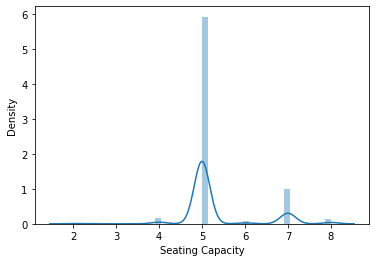

In [25]:
#checking the distribution
sns.distplot(df['Seating Capacity'])

In [26]:
df['Seating Capacity'].median()

5.0

<AxesSubplot:xlabel='Fuel Tank Capacity', ylabel='Density'>

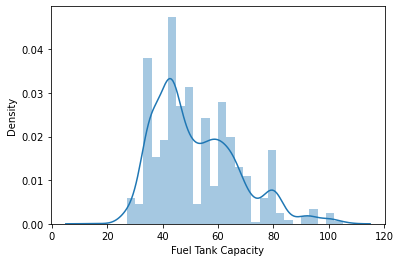

In [27]:
#checking the distribution
sns.distplot(df['Fuel Tank Capacity'])

In [28]:
df['Engine'] = df['Engine'].fillna(df['Engine'].mode()[0])
df['Max Power'] = df['Max Power'].fillna(df['Max Power'].mode()[0])
df['Max Torque'] = df['Max Torque'].fillna(df['Max Torque'].mode()[0])
df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain'].mode()[0])
df['Length'] = df['Length'].fillna(df['Length'].mean())
df['Width'] = df['Width'].fillna(df['Width'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Seating Capacity'] = df['Seating Capacity'].fillna(df['Seating Capacity'].median())
df['Fuel Tank Capacity'] = df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].median())

In [29]:
df.isna().sum()

id                    0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Make                  0
Model                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Price                 0
dtype: int64

In [30]:
df.describe()

,id,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Year,Kilometer,Price
count,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2.059000e+03,2.059000e+03
mean,1030.000000,4280.860652,1767.991980,1591.735338,5.296746,51.892326,2016.425449,5.422471e+04,1.702992e+06
std,594.526422,435.524350,133.145955,133.941421,0.811029,14.696588,3.363564,5.736172e+04,2.419881e+06
min,1.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000,1988.000000,0.000000e+00,4.900000e+04
25%,515.500000,3986.000000,1695.000000,1485.000000,5.000000,42.000000,2014.000000,2.900000e+04,4.849990e+05
50%,1030.000000,4315.000000,1767.991980,1550.000000,5.000000,50.000000,2017.000000,5.000000e+04,8.250000e+05
75%,1544.500000,4620.000000,1831.000000,1672.000000,5.000000,60.000000,2019.000000,7.200000e+04,1.925000e+06
max,2059.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000,2022.000000,2.000000e+06,3.500000e+07


In [31]:
###checking outliers
df.describe(percentiles=[0.75,0.8,0.9,0.99])

,id,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Year,Kilometer,Price
count,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2.059000e+03,2.059000e+03
mean,1030.000000,4280.860652,1767.991980,1591.735338,5.296746,51.892326,2016.425449,5.422471e+04,1.702992e+06
std,594.526422,435.524350,133.145955,133.941421,0.811029,14.696588,3.363564,5.736172e+04,2.419881e+06
min,1.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000,1988.000000,0.000000e+00,4.900000e+04
50%,1030.000000,4315.000000,1767.991980,1550.000000,5.000000,50.000000,2017.000000,5.000000e+04,8.250000e+05
75%,1544.500000,4620.000000,1831.000000,1672.000000,5.000000,60.000000,2019.000000,7.200000e+04,1.925000e+06
80%,1647.400000,4686.000000,1855.000000,1700.000000,5.000000,64.000000,2019.000000,7.600000e+04,2.435000e+06
90%,1853.200000,4868.000000,1900.000000,1795.000000,7.000000,71.000000,2021.000000,9.000000e+04,4.150200e+06
99%,2038.420000,5219.000000,2141.000000,1975.000000,8.000000,93.840000,2022.000000,1.471000e+05,1.084200e+07
max,2059.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000,2022.000000,2.000000e+06,3.500000e+07


<AxesSubplot:>

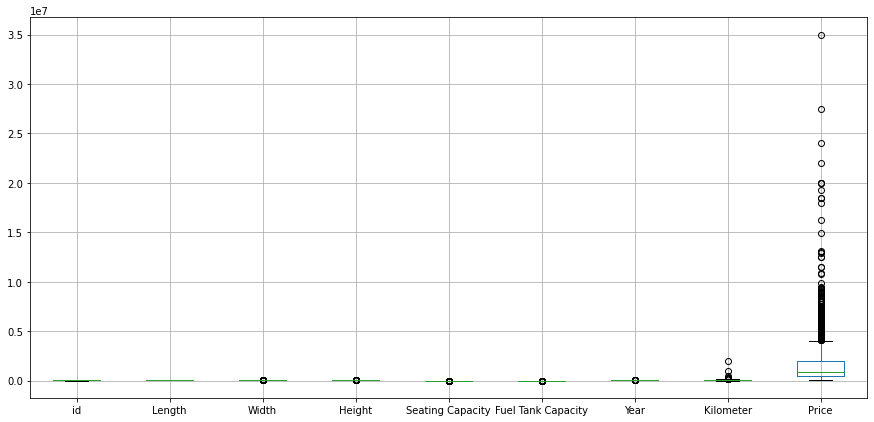

In [32]:
#boxplot to check the outliers
plt.figure(figsize = (15, 7)) 
df.boxplot() 

### Kilometer and price columns have outliers. As we see price column has more outliers

<AxesSubplot:xlabel='Price', ylabel='Density'>

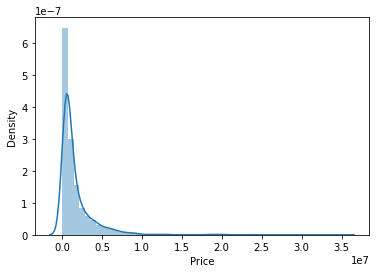

In [33]:
#Need to handle with outliers
sns.distplot(df['Price'])

#### right sckewed

<AxesSubplot:xlabel='Year', ylabel='Density'>

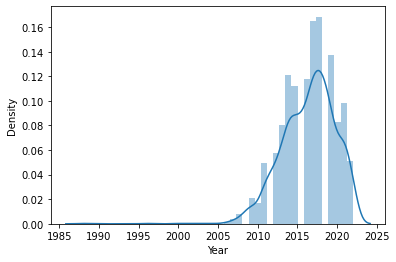

In [34]:
sns.distplot(df['Year'])

#### Left slewed

<AxesSubplot:xlabel='Width', ylabel='Density'>

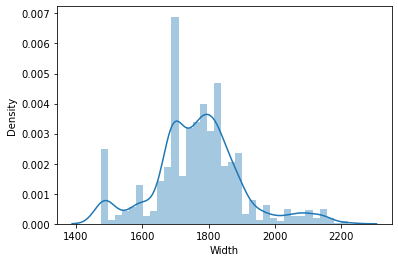

In [35]:
sns.distplot(df['Width'])

#### Gausian distribution

In [36]:
df['Price'].describe()

count    2.059000e+03
mean     1.702992e+06
std      2.419881e+06
min      4.900000e+04
25%      4.849990e+05
50%      8.250000e+05
75%      1.925000e+06
max      3.500000e+07
Name: Price, dtype: float64

Text(0, 0.5, 'kilometers_driven')

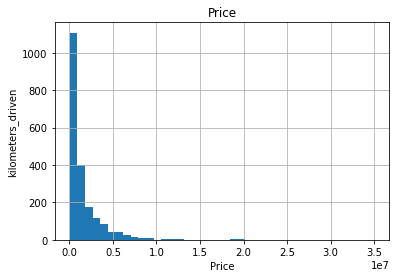

In [37]:
fig = df.Price.hist(bins=40)
fig.set_title('Price')
fig.set_xlabel('Price')
fig.set_ylabel('kilometers_driven')

## Positive Skew

In [38]:
## calculating inter quantile range
Q3 = df.Price.quantile(0.75)
Q1 = df.Price.quantile(0.25)
IQR = Q3 - Q1
IQR

1440001.0

In [39]:
#Outlier 
lower_bridge = df['Price'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Price'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1675002.5
4085001.5


In [40]:
#extreme outlier 
lower_bridge = df['Price'].quantile(0.25)-(IQR*3)
upper_bridge = df['Price'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-3835004.0
6245003.0


<AxesSubplot:xlabel='Kilometer', ylabel='Density'>

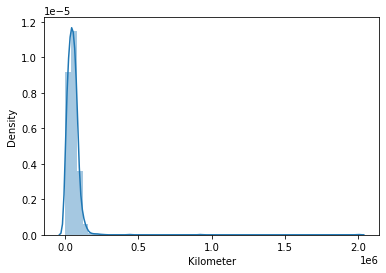

In [41]:
sns.distplot(df['Kilometer'])

#### right sckewed

Text(0, 0.5, 'dencity')

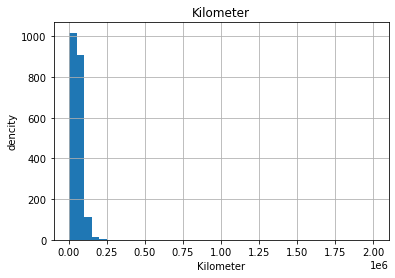

In [42]:
fig = df.Kilometer.hist(bins=40)
fig.set_title('Kilometer')
fig.set_xlabel('Kilometer')
fig.set_ylabel('dencity')

In [43]:
df.Kilometer.describe()

count    2.059000e+03
mean     5.422471e+04
std      5.736172e+04
min      0.000000e+00
25%      2.900000e+04
50%      5.000000e+04
75%      7.200000e+04
max      2.000000e+06
Name: Kilometer, dtype: float64

In [44]:
#calculating the inter quantile range
Q3 = df.Kilometer.quantile(0.75)
Q1 = df.Kilometer.quantile(0.25)
IQR = Q3 - Q1
IQR

43000.0

In [45]:
#Outliers 
lower_bridge = df['Kilometer'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Kilometer'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-35500.0
136500.0


In [46]:
#copying data from df to data
data = df.copy()

In [47]:
# filling outlier with fixed value
data.loc[data['Price']>=6245003, 'Price']=6245003

In [48]:
data.loc[data['Kilometer']>=136500,'Kilometer']=136500

In [49]:
data.head()

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,...,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,505000
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,...,Swift DZire VDI,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,450000
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,...,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,220000
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,...,Glanza G,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,799000
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,...,Innova 2.4 VX 7 STR [2016-2020],2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,1950000


Text(0, 0.5, 'kilometers_driven')

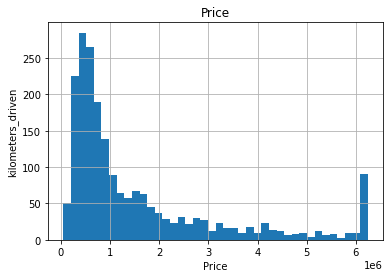

In [50]:
fig = data.Price.hist(bins=40)
fig.set_title('Price')
fig.set_xlabel('Price')
fig.set_ylabel('kilometers_driven')

#### Normally distributed

Text(0, 0.5, 'dencity')

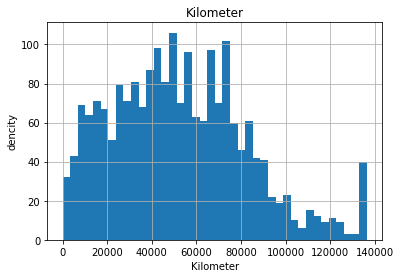

In [51]:
fig = data.Kilometer.hist(bins=40)
fig.set_title('Kilometer')
fig.set_xlabel('Kilometer')
fig.set_ylabel('dencity')

#### Now this is normally distributed

In [52]:
data.head()

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,...,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,505000
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,...,Swift DZire VDI,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,450000
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,...,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,220000
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,...,Glanza G,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,799000
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,...,Innova 2.4 VX 7 STR [2016-2020],2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,1950000


In [53]:
data["Max Power"] = data["Max Power"].str.split("@").str[0]
data["Max Torque"] = data["Max Torque"].str.split("@").str[0]
data["Model"] = data["Model"].str.split(" ").str[0]

In [54]:
data.head()

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price
0,1,1198 cc,87 bhp,109 Nm,FWD,3990.0,1680.0,1505.0,5.0,35.0,...,Amaze,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,505000
1,2,1248 cc,74 bhp,190 Nm,FWD,3995.0,1695.0,1555.0,5.0,42.0,...,Swift,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,450000
2,3,1197 cc,79 bhp,112.7619 Nm,FWD,3585.0,1595.0,1550.0,5.0,35.0,...,i10,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,220000
3,4,1197 cc,82 bhp,113 Nm,FWD,3995.0,1745.0,1510.0,5.0,37.0,...,Glanza,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,799000
4,5,2393 cc,148 bhp,343 Nm,RWD,4735.0,1830.0,1795.0,7.0,55.0,...,Innova,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,1950000


In [55]:
data["Engine"] = data["Engine"].str.strip(" cc").astype(float)
data["Max Power"] = data["Max Power"].str.strip(" bhp").astype(float)
data["Max Torque"] = data["Max Torque"].str.strip(" Nm").astype(float)

In [56]:
data.head()

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price
0,1,1198.0,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0,...,Amaze,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,505000
1,2,1248.0,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0,...,Swift,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,450000
2,3,1197.0,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,...,i10,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,220000
3,4,1197.0,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0,...,Glanza,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,799000
4,5,2393.0,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0,...,Innova,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,1950000


In [57]:
data = data.drop(['id', 'Length', 'Width', 'Height','Color','Location'],axis=1)

In [58]:
data.head()

,Engine,Max Power,Max Torque,Drivetrain,Seating Capacity,Fuel Tank Capacity,Make,Model,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Price
0,1198.0,87.0,109.0000,FWD,5.0,35.0,Honda,Amaze,2017,87150,Petrol,Manual,First,Corporate,505000
1,1248.0,74.0,190.0000,FWD,5.0,42.0,Maruti Suzuki,Swift,2014,75000,Diesel,Manual,Second,Individual,450000
2,1197.0,79.0,112.7619,FWD,5.0,35.0,Hyundai,i10,2011,67000,Petrol,Manual,First,Individual,220000
3,1197.0,82.0,113.0000,FWD,5.0,37.0,Toyota,Glanza,2019,37500,Petrol,Manual,First,Individual,799000
4,2393.0,148.0,343.0000,RWD,7.0,55.0,Toyota,Innova,2018,69000,Diesel,Manual,First,Individual,1950000


In [59]:
data.columns

Index(['Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Seating Capacity',
       'Fuel Tank Capacity', 'Make', 'Model', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Owner', 'Seller Type', 'Price'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Engine              2059 non-null   float64
 1   Max Power           2059 non-null   float64
 2   Max Torque          2059 non-null   float64
 3   Drivetrain          2059 non-null   object 
 4   Seating Capacity    2059 non-null   float64
 5   Fuel Tank Capacity  2059 non-null   float64
 6   Make                2059 non-null   object 
 7   Model               2059 non-null   object 
 8   Year                2059 non-null   int64  
 9   Kilometer           2059 non-null   int64  
 10  Fuel Type           2059 non-null   object 
 11  Transmission        2059 non-null   object 
 12  Owner               2059 non-null   object 
 13  Seller Type         2059 non-null   object 
 14  Price               2059 non-null   int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 257.4+

## 5. Visualization

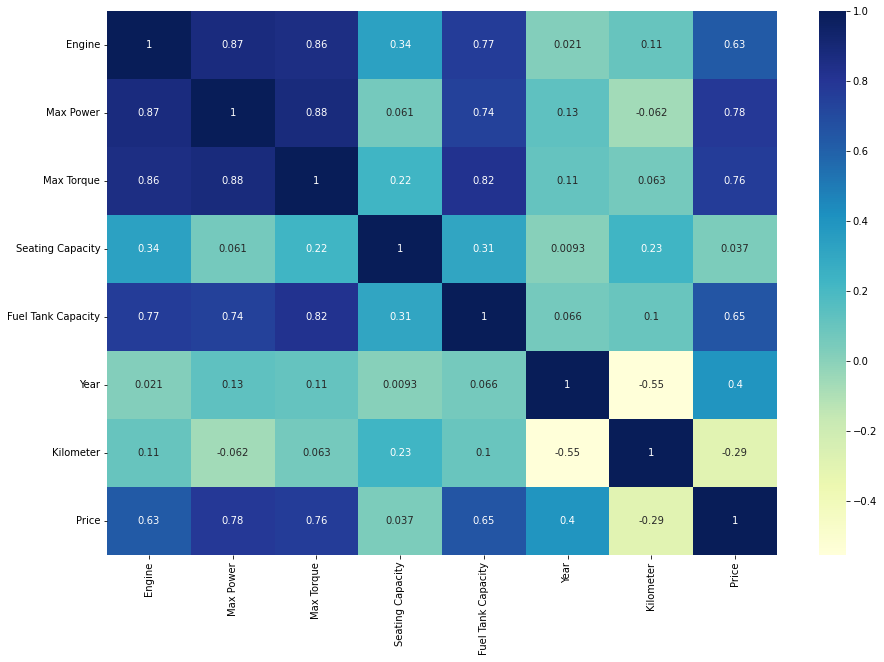

In [61]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

### The above heatmap tells about the corrilation 

### Engine and max power are highly corrilated and engine and max torque are highly corrilated

### Univariate

Text(0, 0.5, 'dencity')

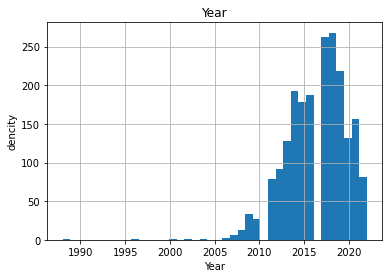

In [62]:
fig = data.Year.hist(bins=40)
fig.set_title('Year')
fig.set_xlabel('Year')
fig.set_ylabel('dencity')

### Left sckewed

Text(0, 0.5, 'dencity')

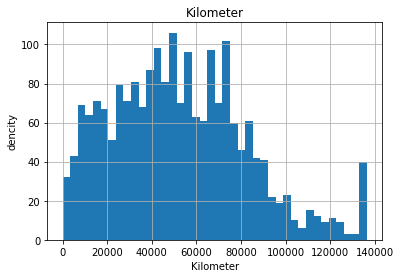

In [63]:
fig = data.Kilometer.hist(bins=40)
fig.set_title('Kilometer')
fig.set_xlabel('Kilometer')
fig.set_ylabel('dencity')

### Gaussion distribution

<AxesSubplot:xlabel='Year', ylabel='Density'>

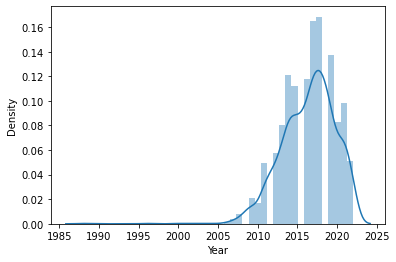

In [64]:
sns.distplot(data['Year'])

### Left sckewed

<AxesSubplot:xlabel='Engine', ylabel='Density'>

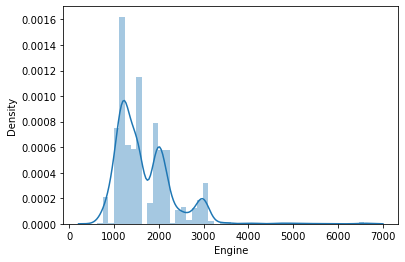

In [65]:
sns.distplot(data['Engine'])

### Right skewed

<AxesSubplot:xlabel='Max Power', ylabel='Density'>

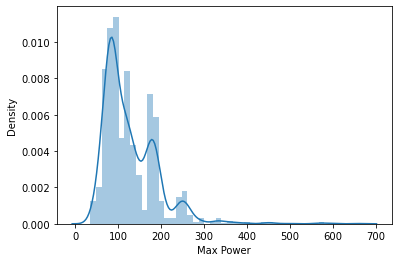

In [66]:
sns.distplot(data['Max Power'])

### Right sckewed

<AxesSubplot:xlabel='Max Torque', ylabel='Density'>

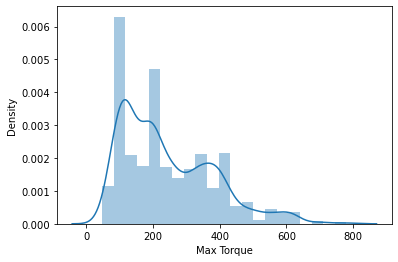

In [67]:
sns.distplot(data['Max Torque'])

### Gaussion distribution

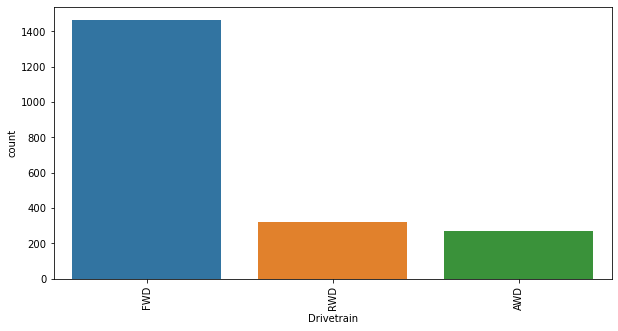

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Drivetrain',data=data, ax = ax, order = data['Drivetrain'].value_counts().iloc[:10].index)

### Front weel drive has more values

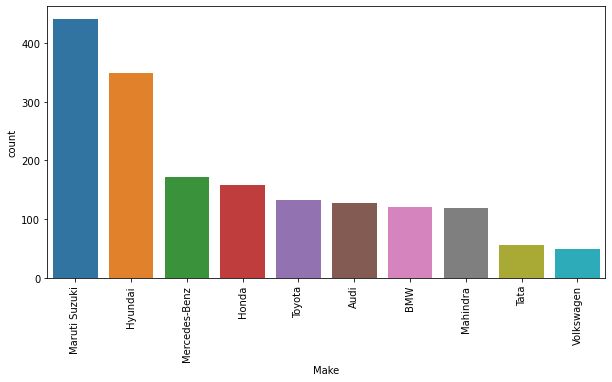

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Make',data=data, ax = ax, order = data['Make'].value_counts().iloc[:10].index)

### Maruti suzuki was sold most

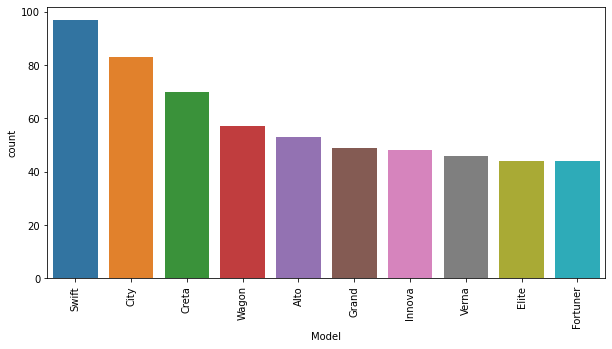

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Model',data=data, ax = ax, order = data['Model'].value_counts().iloc[:10].index)

### Swift sold many times

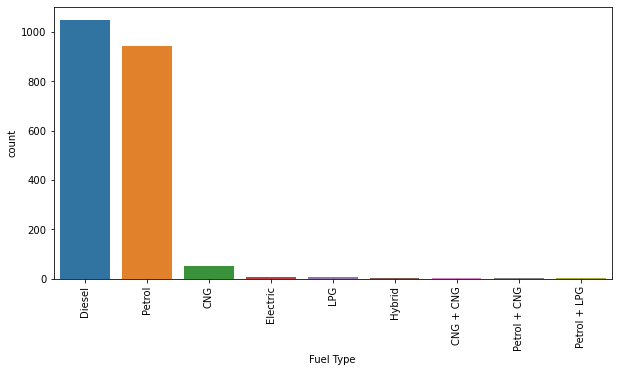

In [71]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Fuel Type',data=data, ax = ax, order = data['Fuel Type'].value_counts().iloc[:10].index)

### Diesel and petrol cars more than others

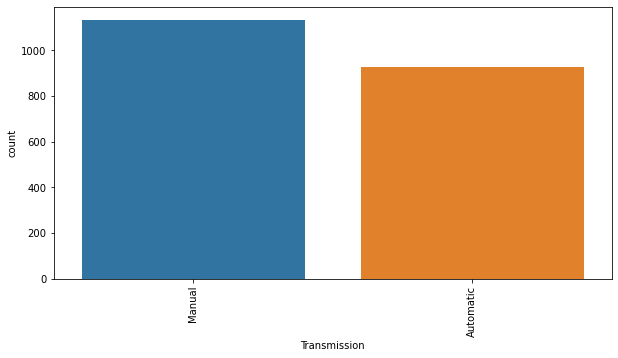

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Transmission',data=data, ax = ax, order = data['Transmission'].value_counts().iloc[:10].index)

### Manual trainsmission cars are more than automatic cars

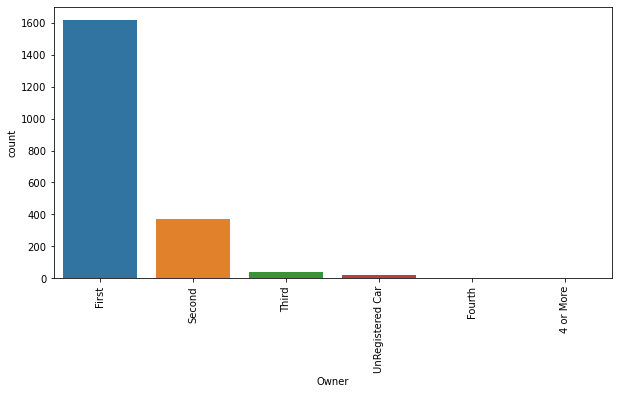

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Owner',data=data, ax = ax, order = data['Owner'].value_counts().iloc[:10].index)

### Owner column contains firstowner as maximum 

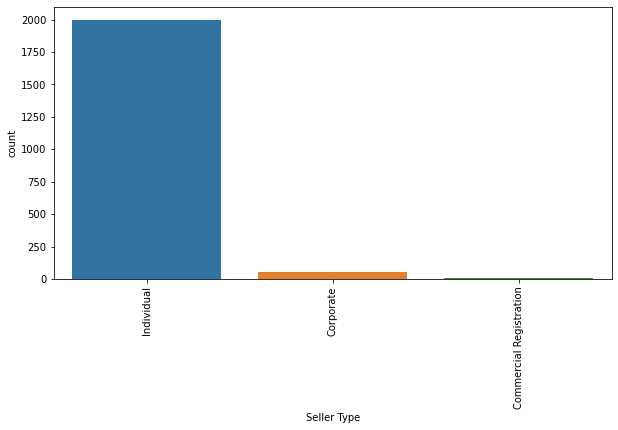

In [74]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='Seller Type',data=data, ax = ax, order = data['Seller Type'].value_counts().iloc[:10].index)

### Now we can remove seller type column becouse Individual contains more values

In [75]:
data = data.drop(['Seller Type'], axis = 1)

### Bivariate

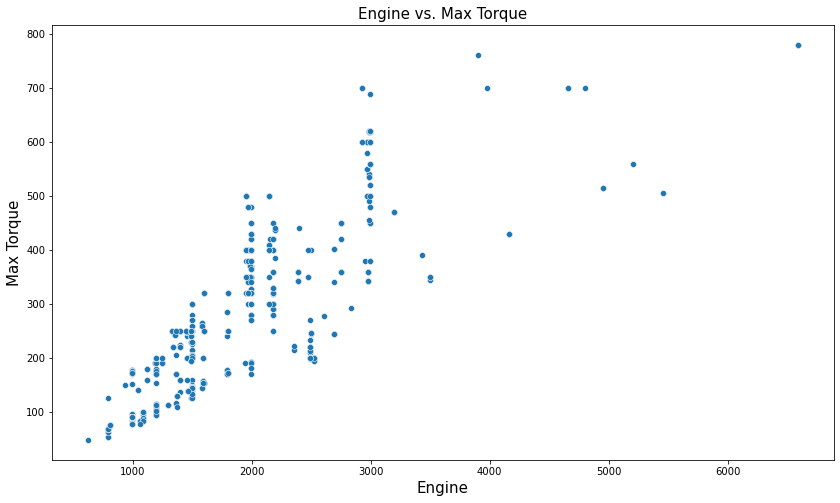

In [76]:
# plotting the target-Fuel type scatter graph
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=data, x="Engine", y="Max Torque", ax = ax)
plt.title("Engine vs. Max Torque", size=15)
plt.xlabel("Engine", size=15)
plt.ylabel(("Max Torque"), size=15)
plt.show()

### As Engine cc increcess Max torque increcess

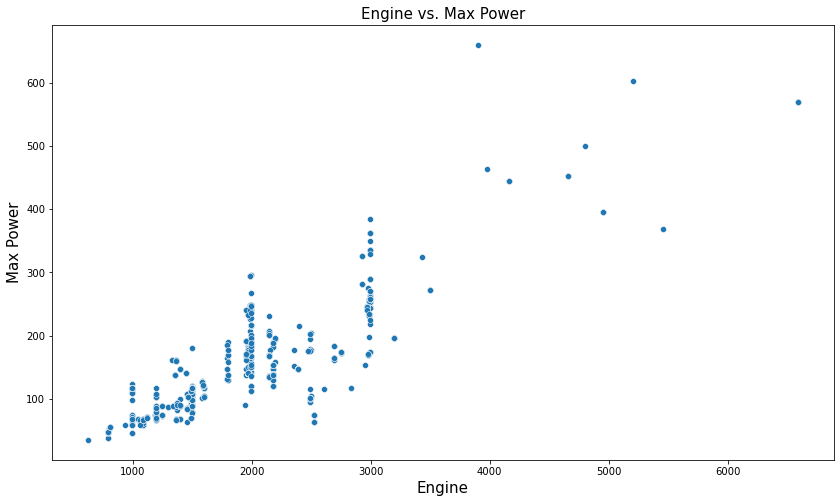

In [77]:
# plotting the target-Fuel type scatter graph
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=data, x="Engine", y="Max Power", ax = ax)
plt.title("Engine vs. Max Power", size=15)
plt.xlabel("Engine", size=15)
plt.ylabel(("Max Power"), size=15)
plt.show()

### As Engine cc increcess Max Power increcess

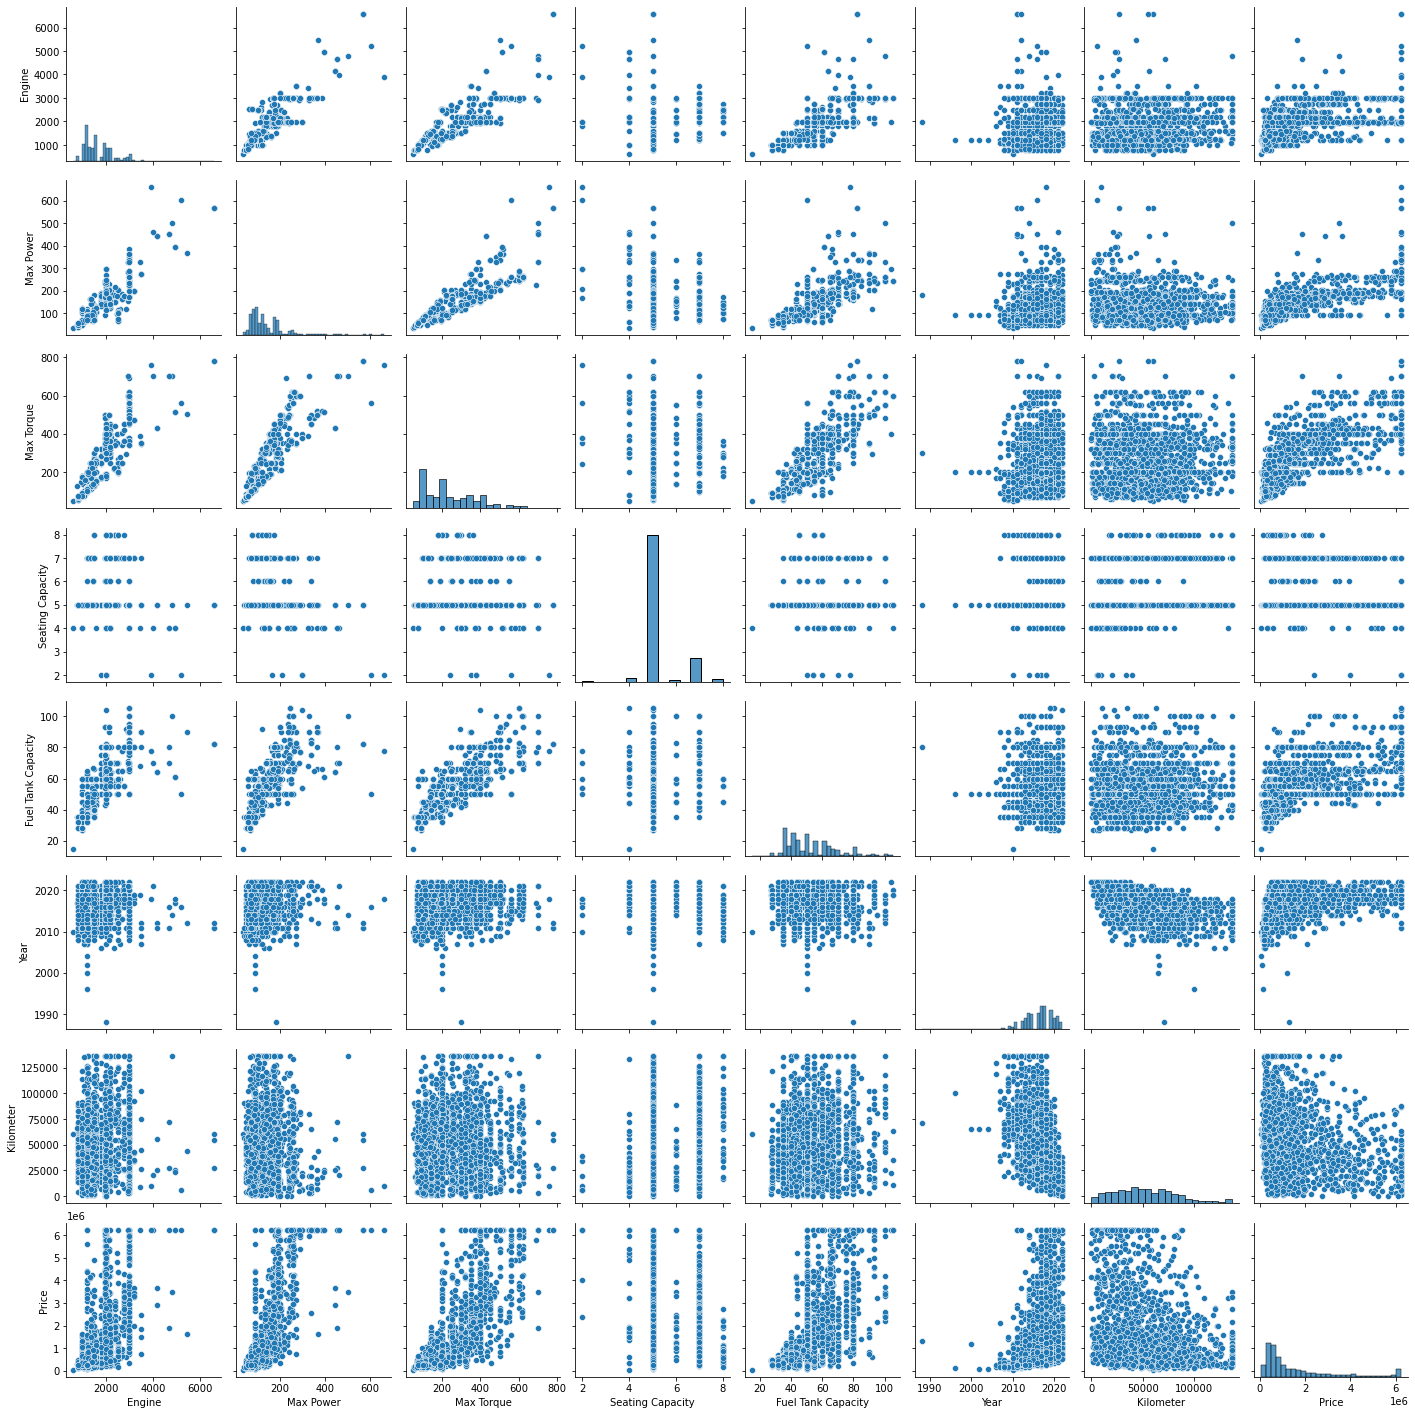

In [78]:
sns.pairplot(data)

### In pairplot corrilation can be seen clearly

In [79]:
data = data.drop(['Max Torque', 'Max Power', 'Fuel Tank Capacity'], axis=1)

In [80]:
data.head()

,Engine,Drivetrain,Seating Capacity,Make,Model,Year,Kilometer,Fuel Type,Transmission,Owner,Price
0,1198.0,FWD,5.0,Honda,Amaze,2017,87150,Petrol,Manual,First,505000
1,1248.0,FWD,5.0,Maruti Suzuki,Swift,2014,75000,Diesel,Manual,Second,450000
2,1197.0,FWD,5.0,Hyundai,i10,2011,67000,Petrol,Manual,First,220000
3,1197.0,FWD,5.0,Toyota,Glanza,2019,37500,Petrol,Manual,First,799000
4,2393.0,RWD,7.0,Toyota,Innova,2018,69000,Diesel,Manual,First,1950000


## 6. Encoding categorical variables

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [82]:
data['Transmission'] = le.fit_transform(data['Transmission'])
data['Fuel Type'] = le.fit_transform(data['Fuel Type'])
data['Owner'] = le.fit_transform(data['Owner'])
data['Drivetrain'] = le.fit_transform(data['Drivetrain'])

In [83]:
data.head()

,Engine,Drivetrain,Seating Capacity,Make,Model,Year,Kilometer,Fuel Type,Transmission,Owner,Price
0,1198.0,1,5.0,Honda,Amaze,2017,87150,6,1,1,505000
1,1248.0,1,5.0,Maruti Suzuki,Swift,2014,75000,2,1,3,450000
2,1197.0,1,5.0,Hyundai,i10,2011,67000,6,1,1,220000
3,1197.0,1,5.0,Toyota,Glanza,2019,37500,6,1,1,799000
4,2393.0,2,7.0,Toyota,Innova,2018,69000,2,1,1,1950000


In [84]:
data['Year'].describe()

count    2059.000000
mean     2016.425449
std         3.363564
min      1988.000000
25%      2014.000000
50%      2017.000000
75%      2019.000000
max      2022.000000
Name: Year, dtype: float64

In [85]:
data['Final_Year'] = 2022

In [86]:
data['No._Years']=data['Final_Year']- data['Year']

In [87]:
data = data.drop(['Final_Year', 'Year'],axis=1)

In [88]:
data.head()

,Engine,Drivetrain,Seating Capacity,Make,Model,Kilometer,Fuel Type,Transmission,Owner,Price,No._Years
0,1198.0,1,5.0,Honda,Amaze,87150,6,1,1,505000,5
1,1248.0,1,5.0,Maruti Suzuki,Swift,75000,2,1,3,450000,8
2,1197.0,1,5.0,Hyundai,i10,67000,6,1,1,220000,11
3,1197.0,1,5.0,Toyota,Glanza,37500,6,1,1,799000,3
4,2393.0,2,7.0,Toyota,Innova,69000,2,1,1,1950000,4


In [89]:
data=pd.get_dummies(data,drop_first=True)

In [90]:
## We are using get_dummies to make all the dummies into features
X=data.drop(['Price'],axis = 1)
y=data['Price']
X.head()

,Engine,Drivetrain,Seating Capacity,Kilometer,Fuel Type,Transmission,Owner,No._Years,Make_BMW,Make_Chevrolet,...,Model_XUV500,Model_XUV700,Model_Xcent,Model_Xylo,Model_Yaris,Model_ZS,Model_Zen,Model_Zest,Model_i10,Model_i20
0,1198.0,1,5.0,87150,6,1,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1248.0,1,5.0,75000,2,1,3,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1197.0,1,5.0,67000,6,1,1,11,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1197.0,1,5.0,37500,6,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2393.0,2,7.0,69000,2,1,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Columns: 236 entries, Engine to Model_i20
dtypes: float64(2), int32(4), int64(3), uint8(227)
memory usage: 649.7 KB


## 7. Splitting the dataset train test

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 8. Feature Scaling

In [94]:
##normalising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [95]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

## Model Building

In [96]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
model = Lasso(alpha=1)

In [97]:
model.fit(X_train, y_train)

Lasso(alpha=1)

In [98]:
model.score(X_train, y_train)*100

90.01583195798445

In [99]:
y_pred = model.predict(X_test)

In [100]:
from sklearn import metrics
print('Lasso')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred)*100))
score = metrics.r2_score(y_test,y_pred)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Lasso
r2_score 84.64
Adjusted_r2_score 75.19
MAE: 409502.61
RMSE: 641860.23


# without sklearn

## Model building

In [101]:
import numpy as np

class LassoRegression:
    def __init__(self, alpha, max_iter=1000, tol=1e-4):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        m, n = X.shape
        theta = np.zeros(n)
        self.intercept_ = np.mean(y)
        X_centered = X - np.mean(X, axis=0)
        for iteration in range(self.max_iter):
            old_theta = theta.copy()
            for j in range(n):
                X_j = X_centered[:, j]
                y_pred = X_centered.dot(theta) + self.intercept_
                r = y - y_pred + theta[j] * X_j
                z = X_j.dot(X_j)
                if z == 0:
                    theta[j] = 0
                else:
                    theta[j] = np.sign(np.sum(X_j*r)) * max(0, np.abs(np.sum(X_j*r)) - self.alpha) / z
            self.intercept_ = np.mean(y - X_centered.dot(theta))
            if np.sum(np.abs(theta - old_theta)) < self.tol:
                break
        self.coef_ = theta
    
    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

In [102]:
# Fit the Lasso regression model
lasso = LassoRegression(alpha=1)
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

In [103]:
import numpy as np

def r2_score(y_test, y_pred):
    sse = np.sum((y_test - y_pred) ** 2)
    sst = np.sum((y_test - np.mean(y_test)) ** 2)
    r2 = 1 - sse / sst
    return r2


In [104]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2*100)

R-squared: 84.64000704423351


In [105]:
import numpy as np

def mean_absolute_error(y_test, y_pred):
    mae = np.mean(np.abs(y_test - y_pred))
    return mae


In [106]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae)

Mean absolute error: 409505.5302289955
